# ***GEREKLİ KÜTÜPHANELER SAYFAYA DAHİL EDİLMESİ VE VERİ SETİNİN ÇAĞIRILMASI***

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, log_loss
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.8 MB/s eta 0:00:00


In [5]:
dfC = pd.read_csv("Healthcare-Diabetes.csv")

In [6]:
df = dfC.copy()

In [ ]:
df.head(3)

Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6      148             72             35        0  33.6   
1   2            1       85             66             29        0  26.6   
2   3            8      183             64              0        0  23.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1

In [ ]:
df.tail(3)

Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
2765  2766            6       85             78              0        0  31.2   
2766  2767            0      129            110             46      130  67.1   
2767  2768            2       81             72             15       76  30.1   

      DiabetesPedigreeFunction  Age  Outcome  
2765                     0.382   42        0  
2766                     0.319   26        1  
2767                     0.547   25        0

# ***KEŞİFSEL VERİ ANALİZİNİN YAPILMASI***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [ ]:
df.shape

(2768, 10)

In [ ]:
df.columns

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.describe().T

count         mean         std     min      25%  \
Id                        2768.0  1384.500000  799.197097   1.000  692.750   
Pregnancies               2768.0     3.742775    3.323801   0.000    1.000   
Glucose                   2768.0   121.102601   32.036508   0.000   99.000   
BloodPressure             2768.0    69.134393   19.231438   0.000   62.000   
SkinThickness             2768.0    20.824422   16.059596   0.000    0.000   
Insulin                   2768.0    80.127890  112.301933   0.000    0.000   
BMI                       2768.0    32.137392    8.076127   0.000   27.300   
DiabetesPedigreeFunction  2768.0     0.471193    0.325669   0.078    0.244   
Age                       2768.0    33.132225   11.777230  21.000   24.000   
Outcome                   2768.0     0.343931    0.475104   0.000    0.000   

                               50%       75%      max  
Id                        1384.500  2076.250  2768.00  
Pregnancies                  3.000     6.000    17.00  
Glucose                    117.000   141.000   199.00  
BloodPressure               72.000    80.000   122.00  
SkinThickness               23.000    32.000   110.00  
Insulin                     37.000   130.000   846.00  
BMI                         32.200    36.625    80.60  
DiabetesPedigreeFunction     0.375     0.624     2.42  
Age                         29.000    40.000    81.00  
Outcome                      0.000     1.000     1.00

In [ ]:
df.isnull().any()

Id                          False
Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.Outcome.value_counts()*100/len(df)

Outcome
0    65.606936
1    34.393064
Name: count, dtype: float64

# ***VERİLERİN GÖRSELLEŞTİRİLMESİ***

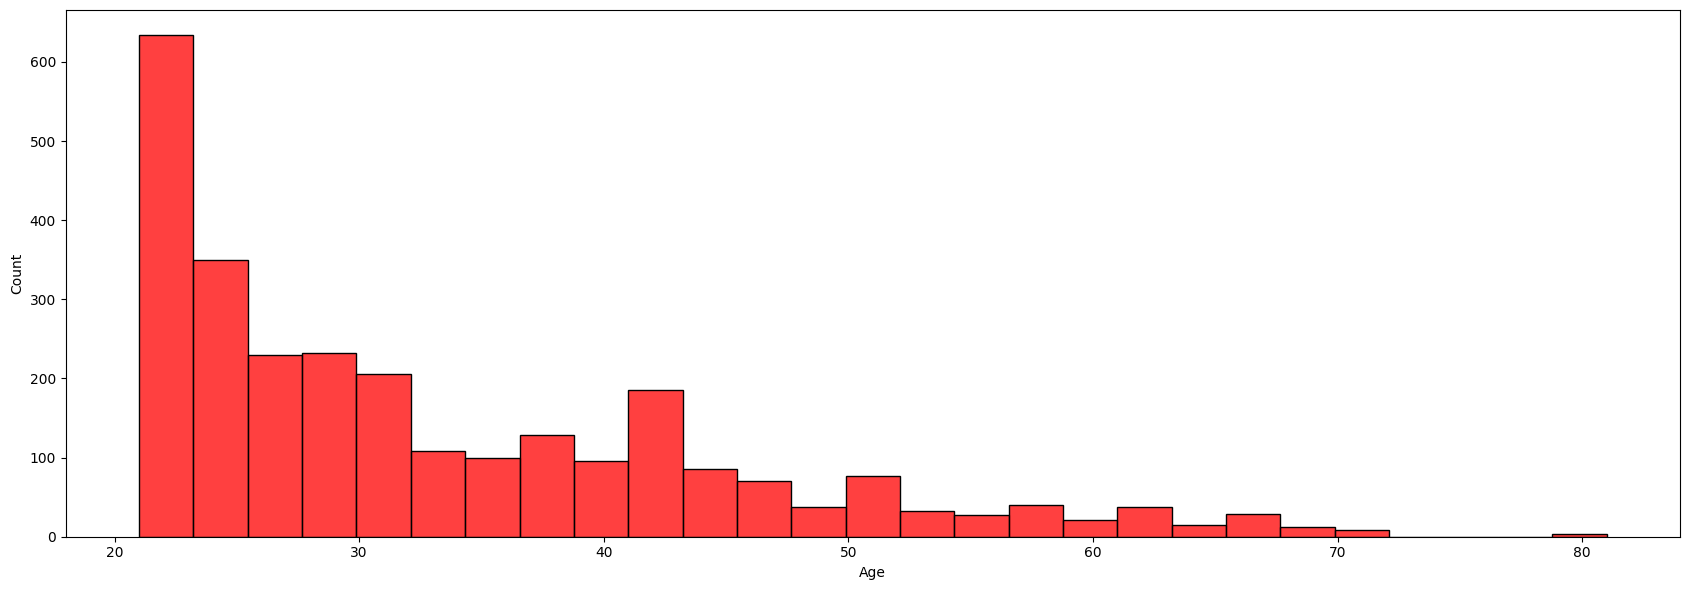

In [ ]:
plt.figure(figsize= (17,6))
sns.histplot(data=df['Age'], color='red')
plt.tight_layout()
plt.show()

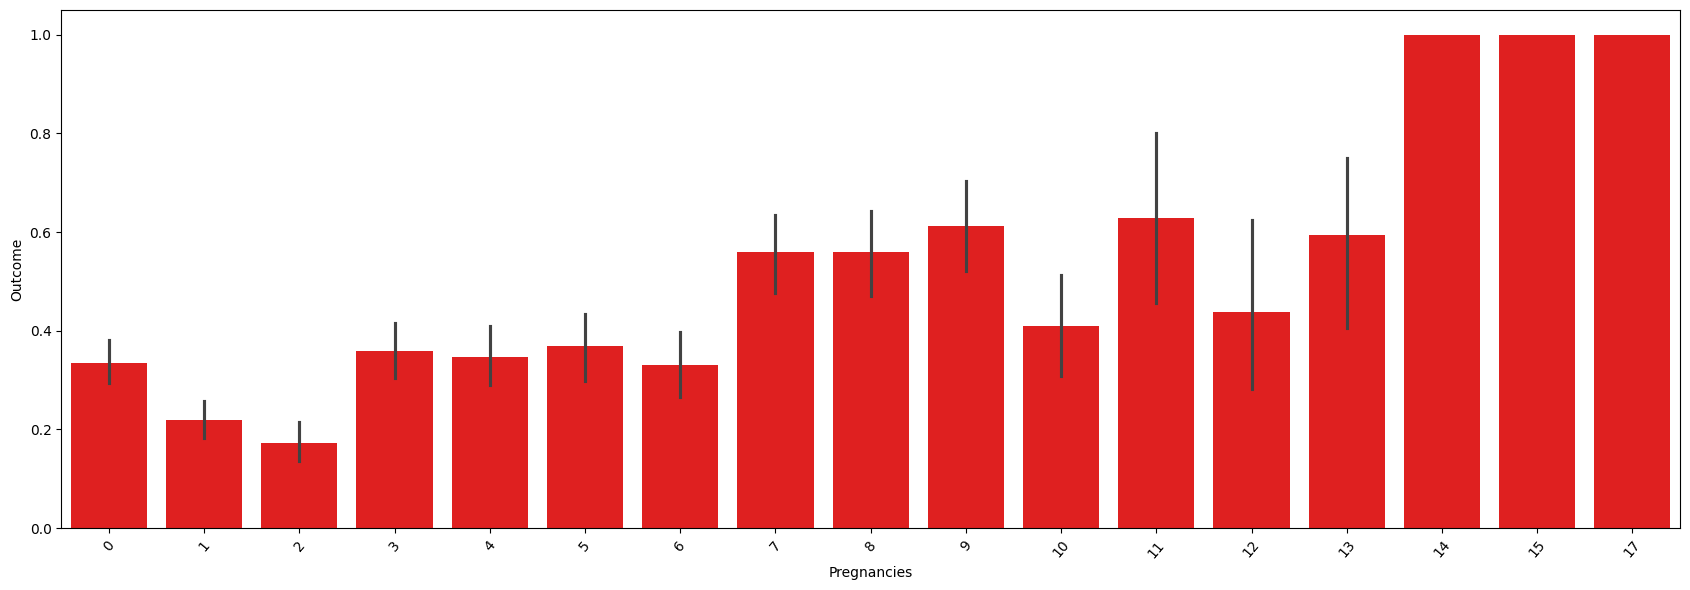

In [ ]:
plt.figure(figsize= (17,6))
sns.barplot(x= "Pregnancies", y = "Outcome", data = df, color = "red")
plt.xlabel("Pregnancies")
plt.ylabel("Outcome")
plt.xticks(rotation = 50)

plt.tight_layout()
plt.show()

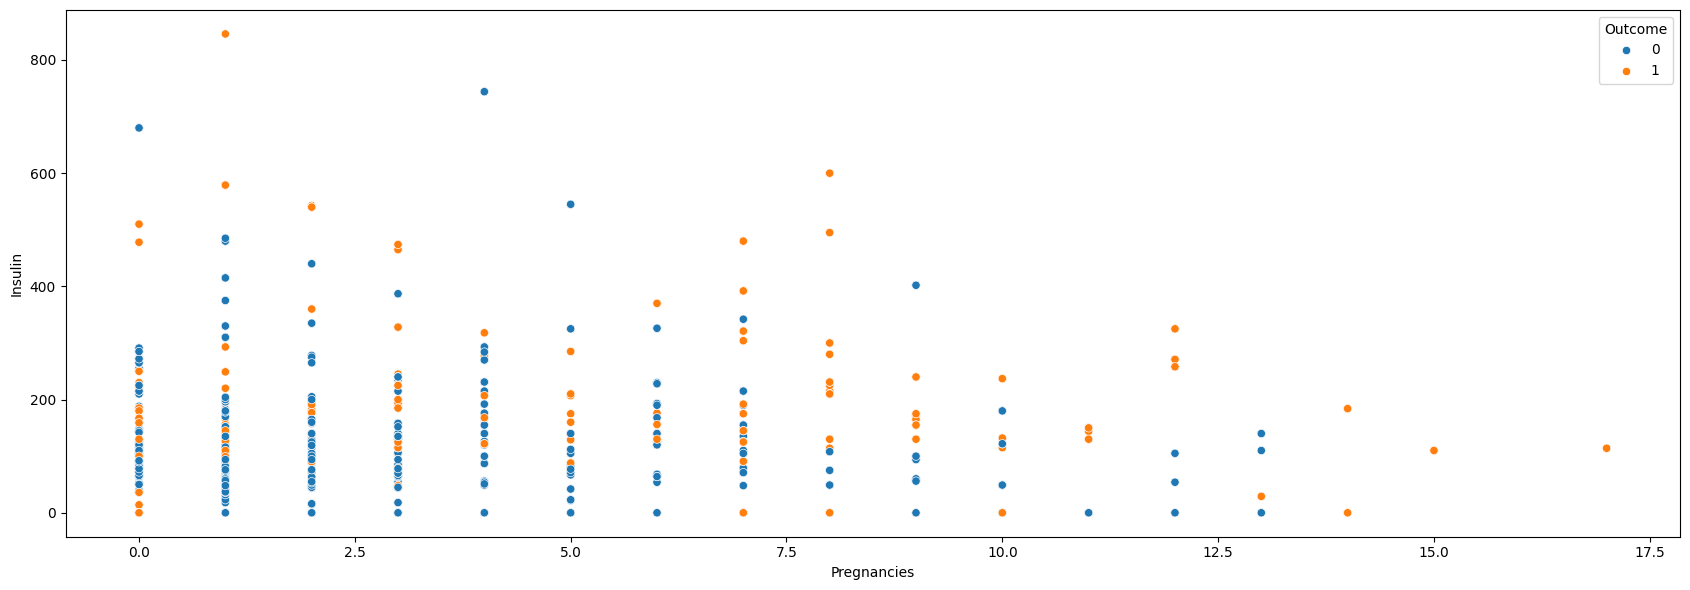

In [ ]:
plt.figure(figsize= (17,6))
sns.scatterplot(x= "Pregnancies", y= "Insulin", data = df, hue = "Outcome")
plt.tight_layout()
plt.show()

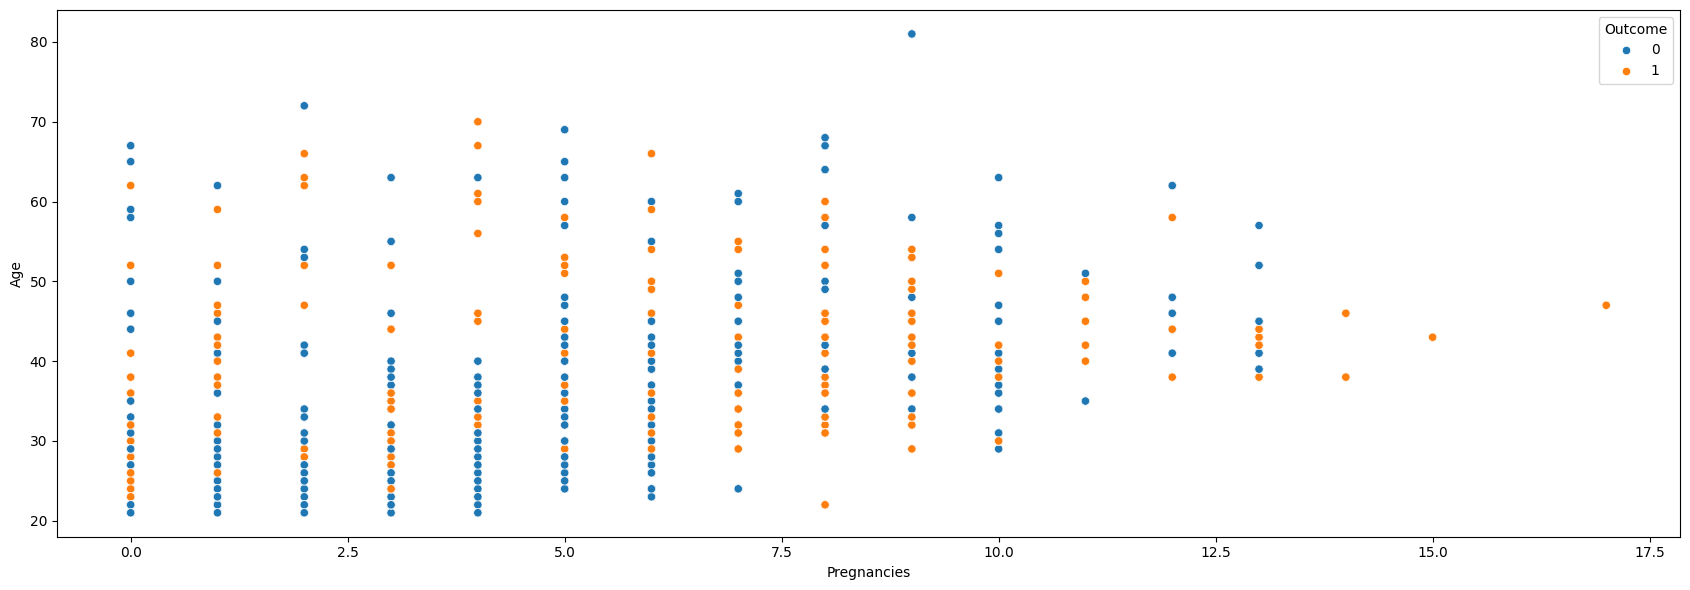

In [ ]:
plt.figure(figsize=(17,6))
sns.scatterplot(x= "Pregnancies", y = "Age", hue = "Outcome", data = df)
plt.tight_layout()
plt.show()

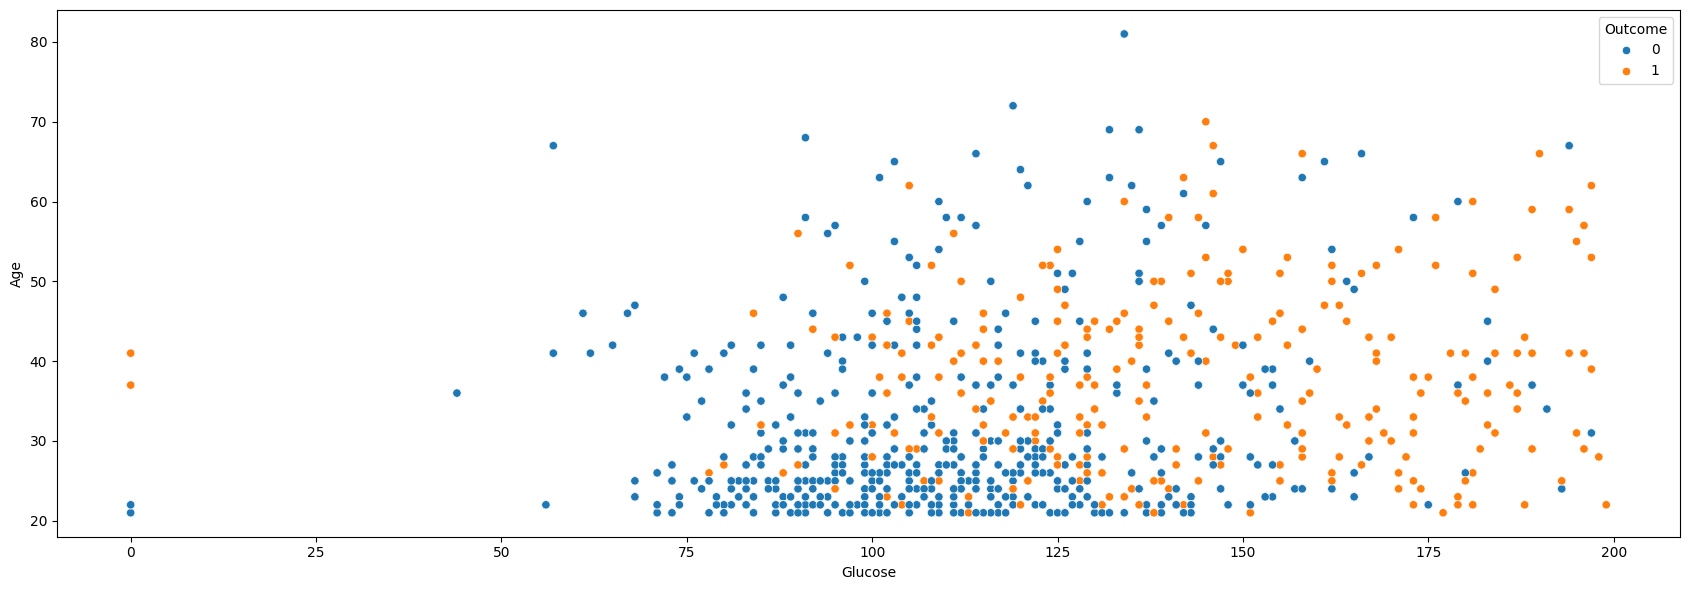

In [ ]:
plt.figure(figsize=(17,6))
sns.scatterplot(x= "Glucose", y= "Age", hue= "Outcome", data = df)
plt.tight_layout()
plt.show()

In [ ]:
korelasyon = df.corr()

In [ ]:
print(korelasyon)

                                Id  Pregnancies   Glucose  BloodPressure  \
Id                        1.000000    -0.024222  0.015010       0.009717   
Pregnancies              -0.024222     1.000000  0.122839       0.147253   
Glucose                   0.015010     0.122839  1.000000       0.142095   
BloodPressure             0.009717     0.147253  0.142095       1.000000   
SkinThickness             0.017702    -0.068673  0.061023       0.201167   
Insulin                   0.007359    -0.075734  0.323445       0.087823   
BMI                       0.024007     0.018761  0.225308       0.281560   
DiabetesPedigreeFunction -0.009695    -0.027731  0.127195       0.048471   
Age                      -0.007404     0.540805  0.256958       0.238684   
Outcome                  -0.006298     0.223796  0.460644       0.072900   

                          SkinThickness   Insulin       BMI  \
Id                             0.017702  0.007359  0.024007   
Pregnancies                   -0.0686

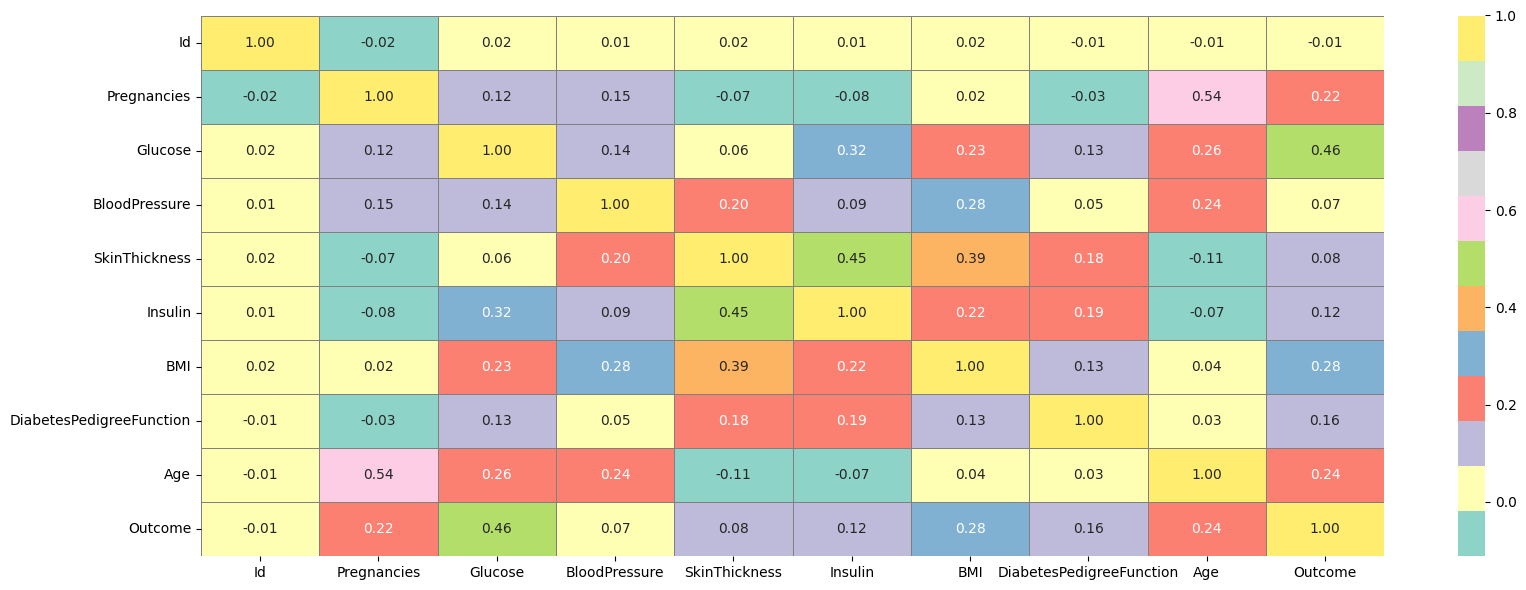

In [ ]:
plt.figure(figsize=(17,6))
sns.heatmap(korelasyon, annot = True, cmap = "Set3", fmt= ".2f", linewidths=0.5, linecolor="gray")
plt.tight_layout()
plt.show()

<ipython-input-26-16a9aad4eaa7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x= "Outcome", y= "Pregnancies", data = df, palette='Set2')


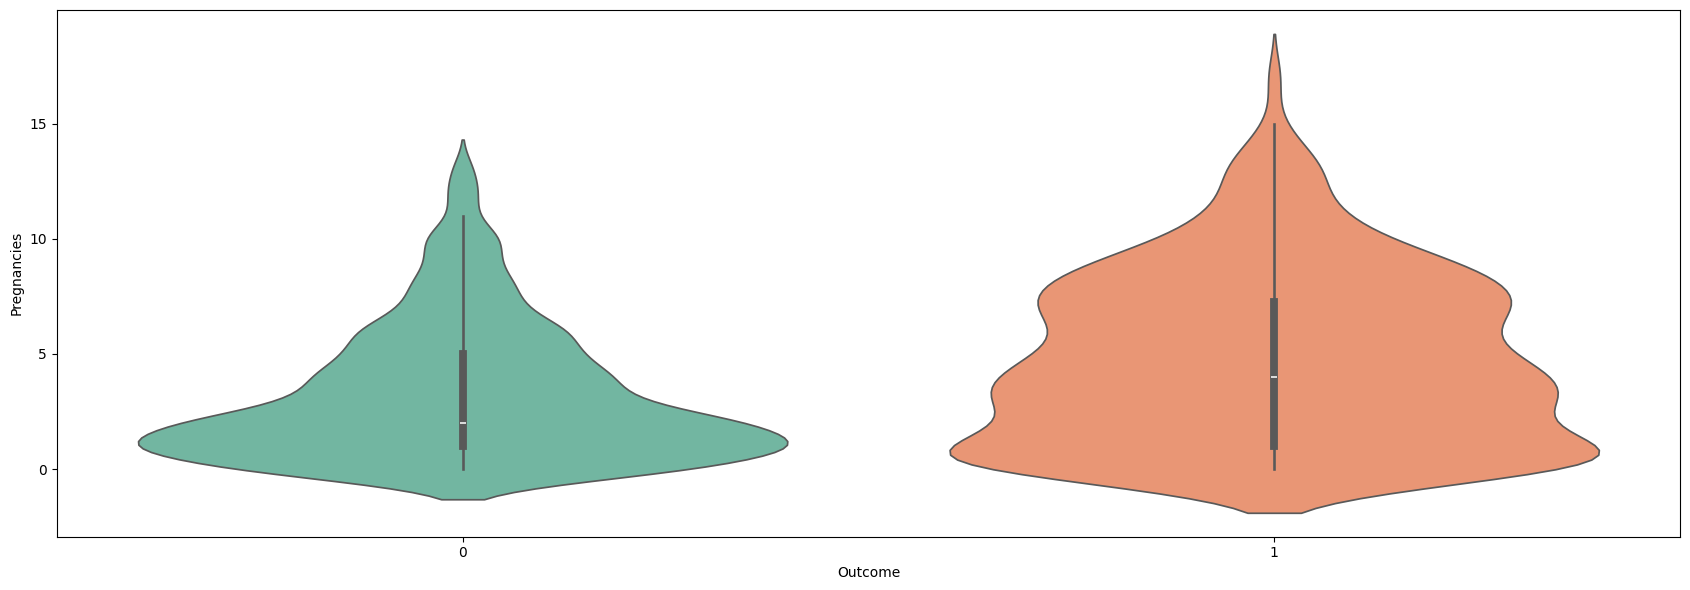

In [ ]:
plt.figure(figsize=(17,6))
sns.violinplot(x= "Outcome", y= "Pregnancies", data = df, palette='Set2')
plt.tight_layout()
plt.show()

<ipython-input-27-5613d41a2f0f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x= "Outcome", y= "Age", data = df, palette='Set2')


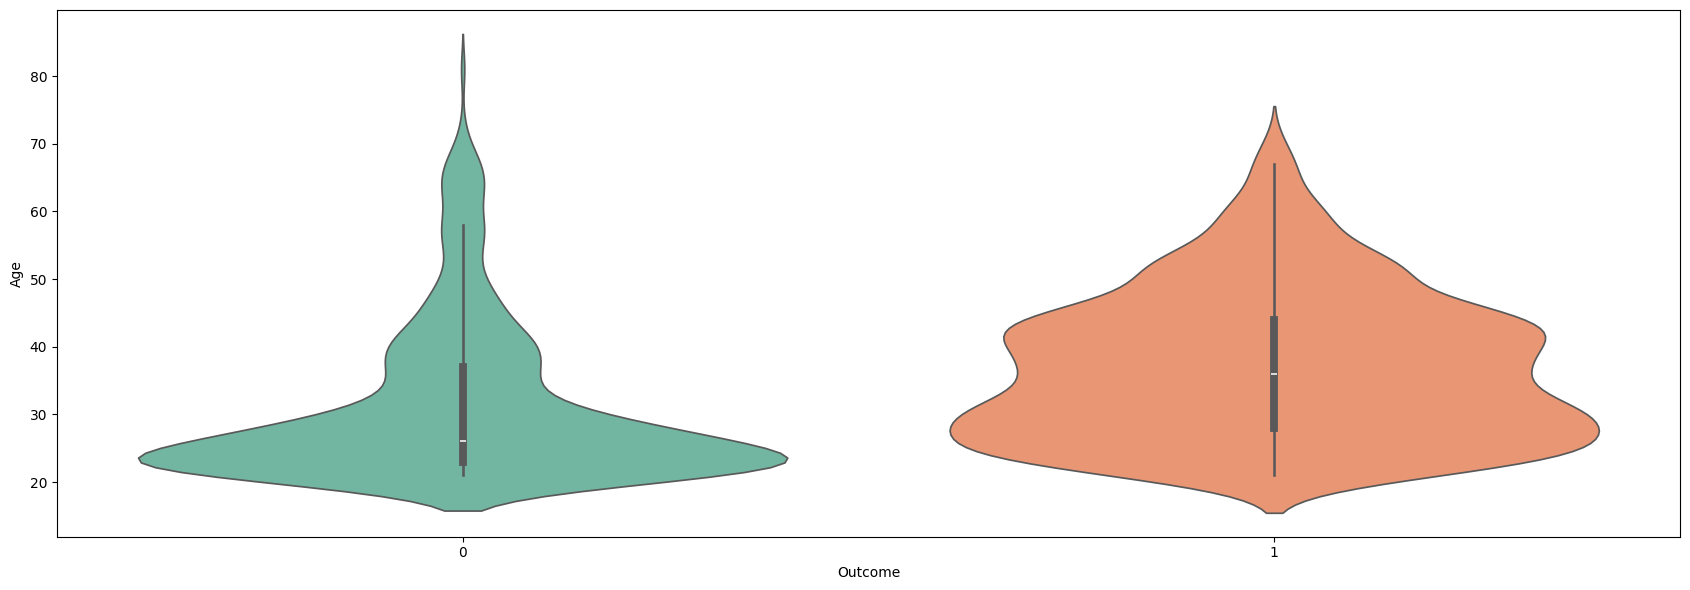

In [ ]:
plt.figure(figsize=(17,6))
sns.violinplot(x= "Outcome", y= "Age", data = df, palette='Set2')
plt.tight_layout()
plt.show()

<ipython-input-28-ebce80287888>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x= "Outcome", y= "Glucose", data = df, palette= 'Set2')


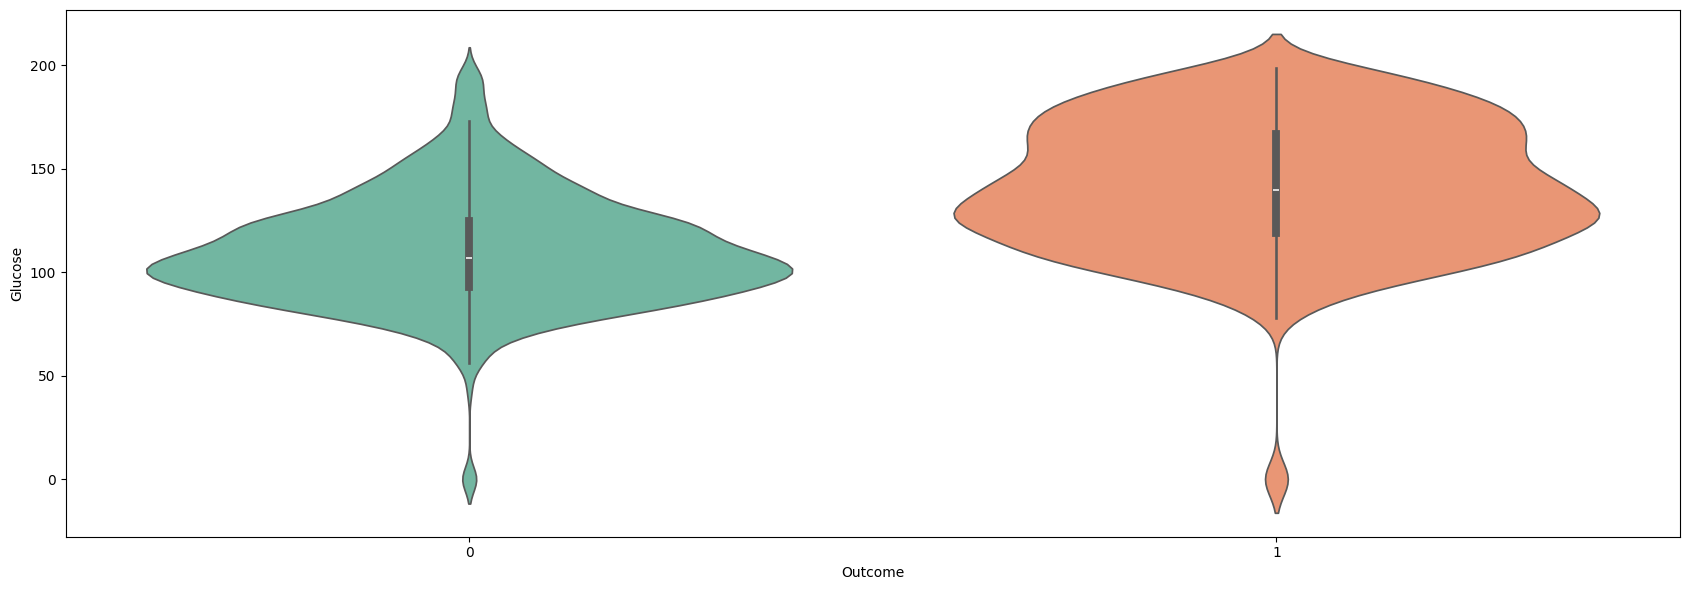

In [ ]:
plt.figure(figsize=(17,6))
sns.violinplot(x= "Outcome", y= "Glucose", data = df, palette= 'Set2')
plt.tight_layout()
plt.show()

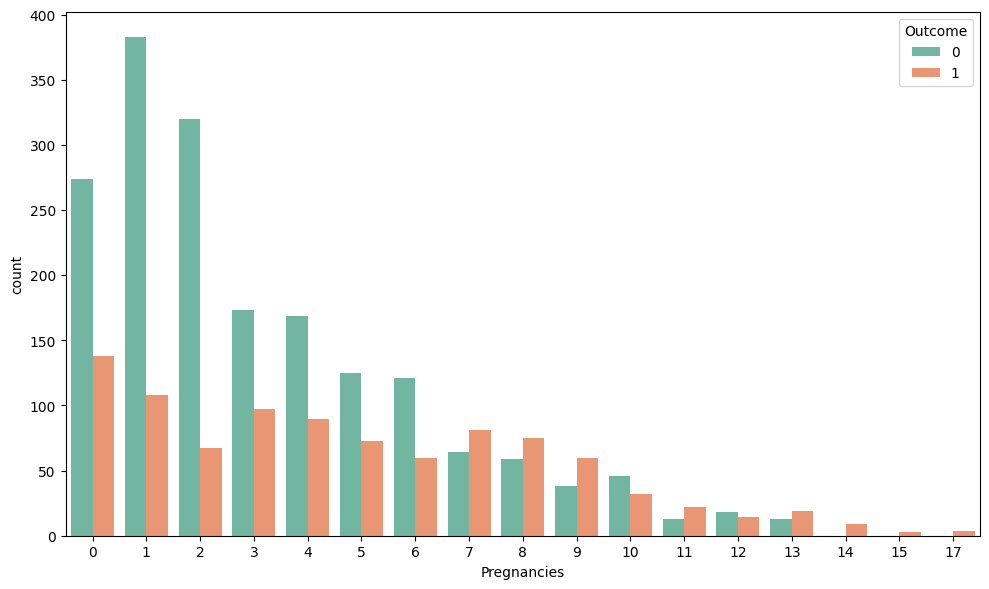

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Pregnancies',data=df,hue='Outcome', palette='Set2')
plt.tight_layout()
plt.show()

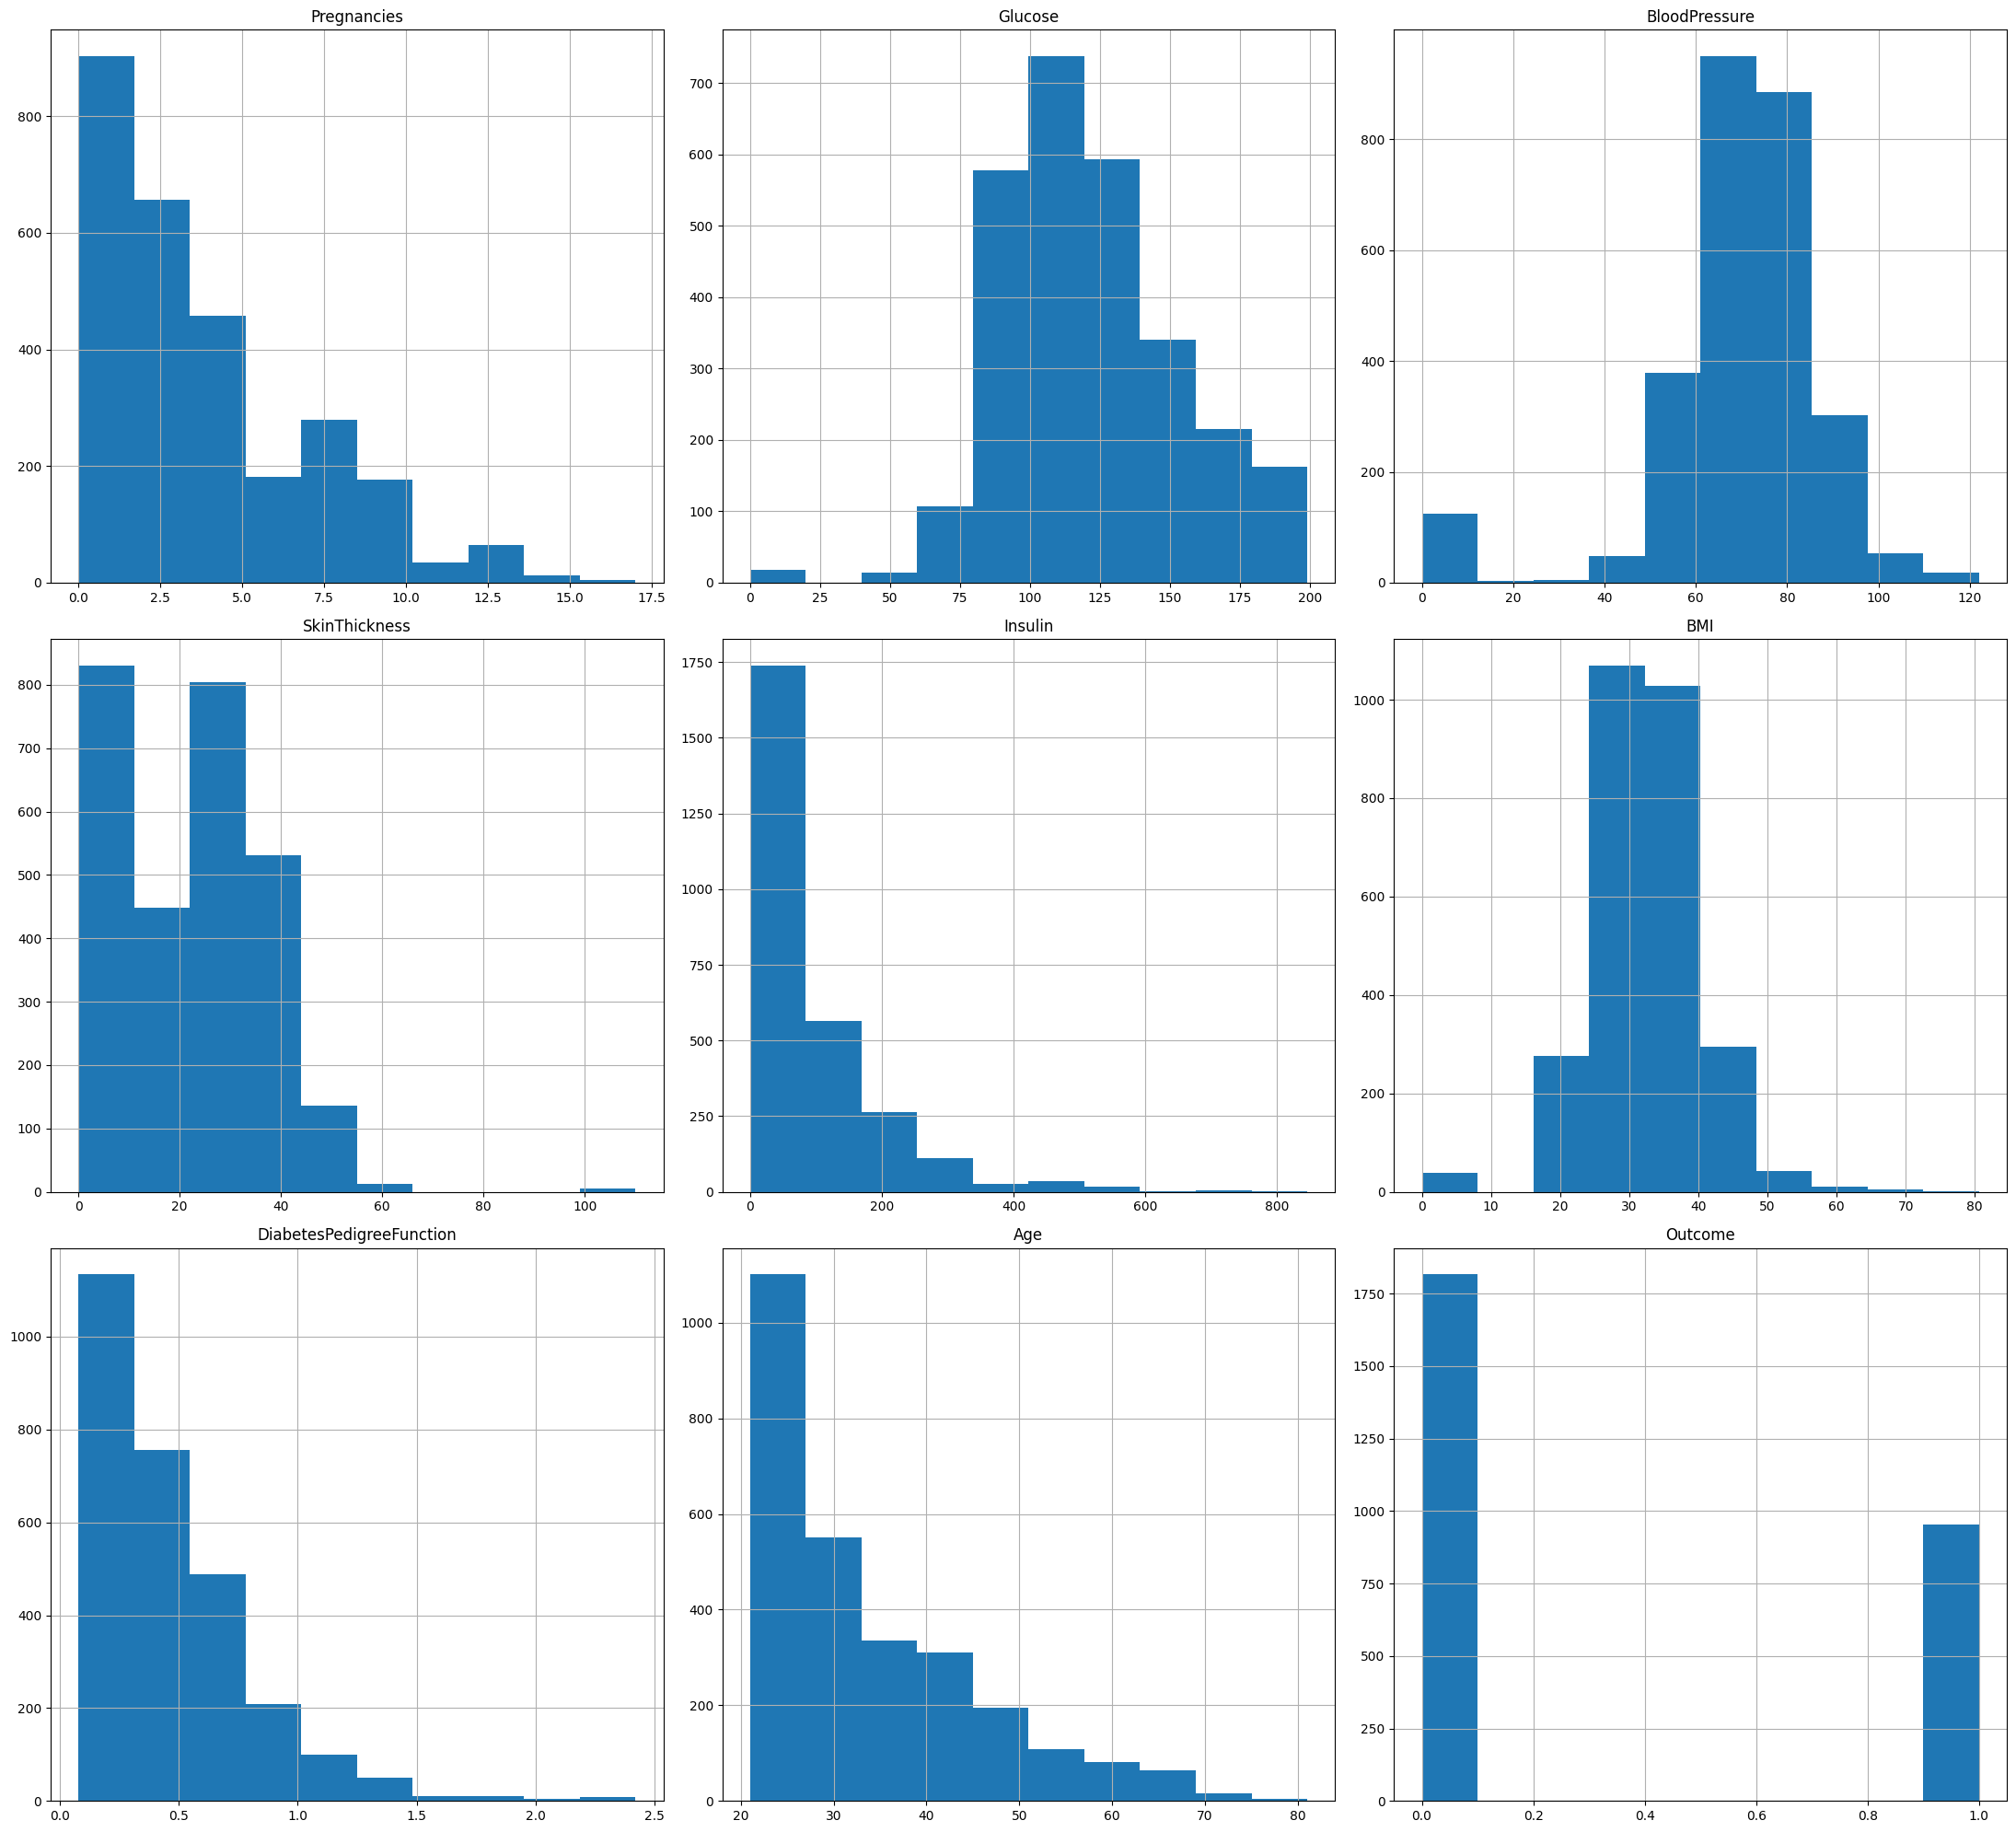

In [ ]:
deger = df.drop(columns=['Id'])
deger.hist(figsize=(22,20))
plt.tight_layout()
plt.show()

<ipython-input-50-cae74f7f91d0>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(df['Outcome'], palette='Set2')


<Figure size 1700x600 with 0 Axes>

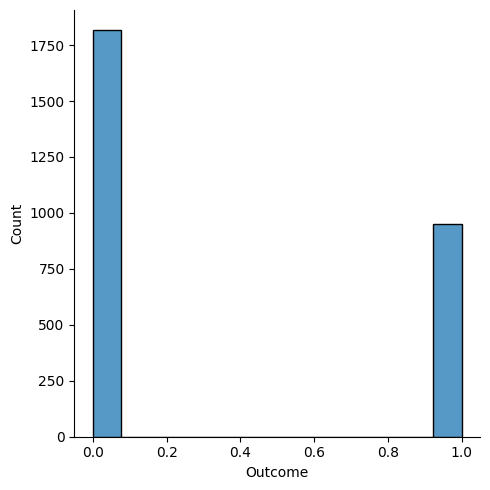

In [ ]:
plt.figure(figsize= (17,6))
sns.displot(df['Outcome'])
plt.tight_layout()
plt.show()

<Figure size 1700x600 with 0 Axes>

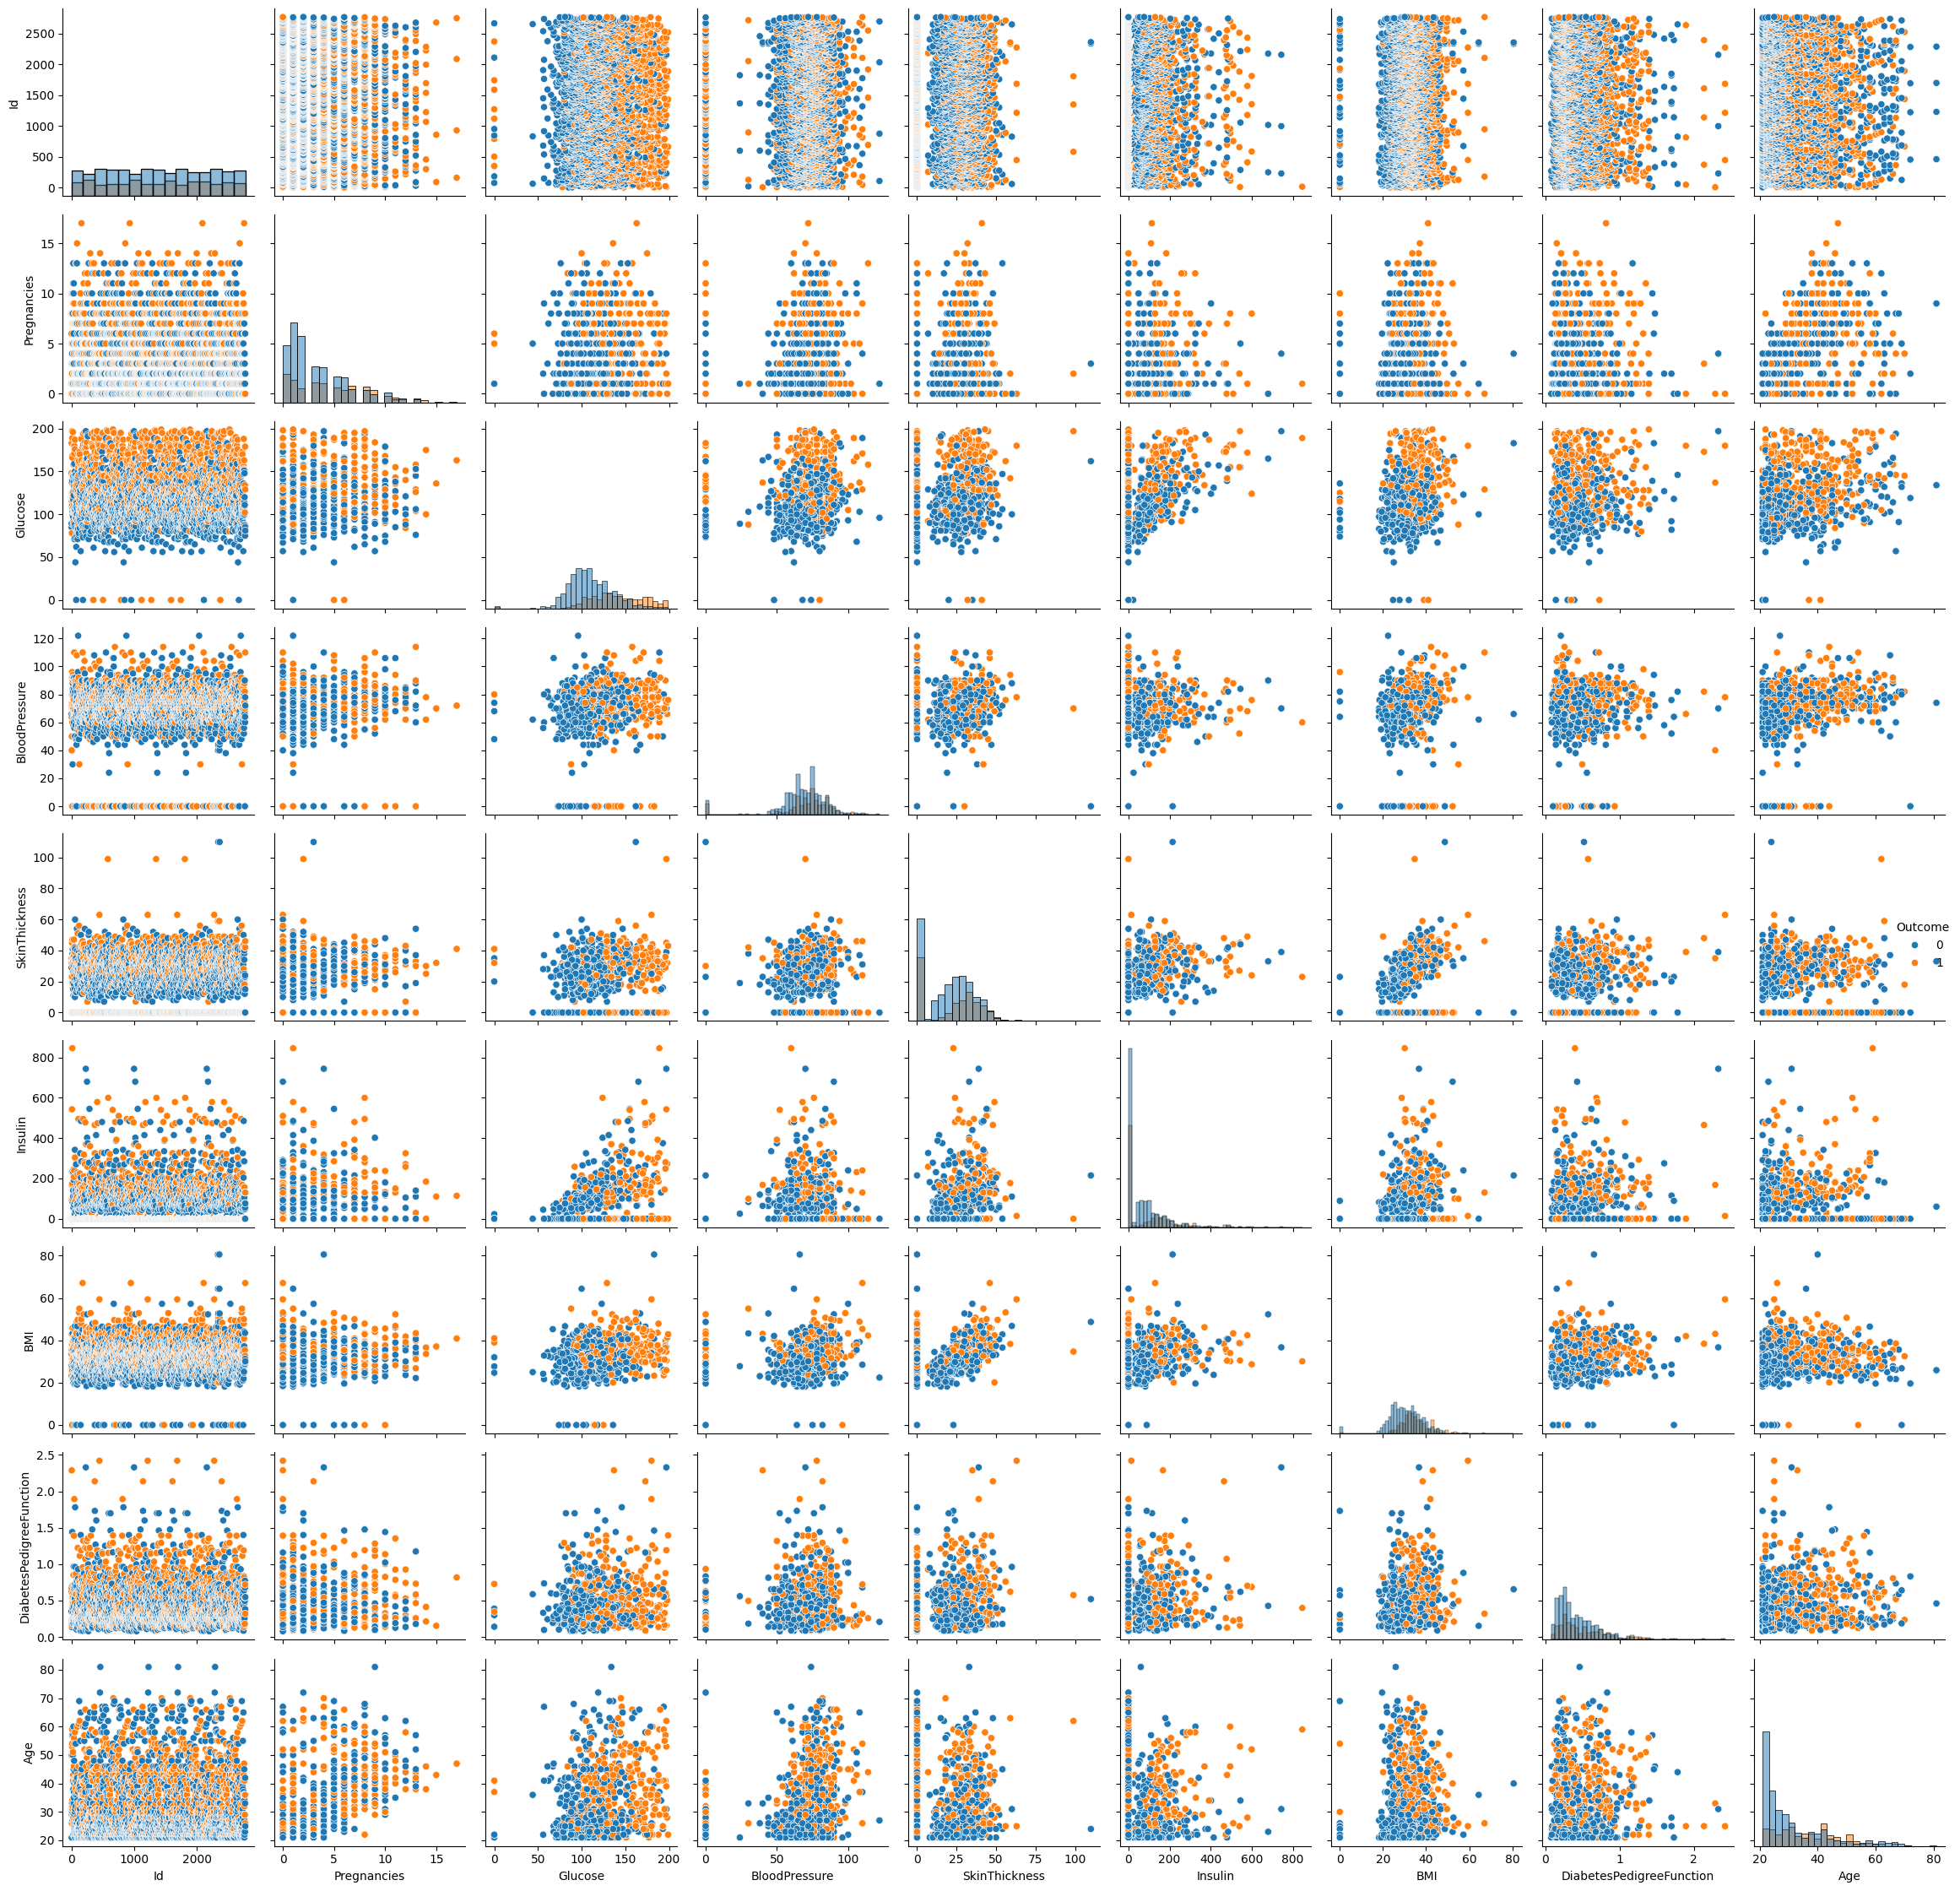

In [ ]:
plt.figure(figsize=(17,6))
sns.pairplot(df, hue='Outcome', diag_kind='hist')
plt.tight_layout()
plt.show()

# ***VERİ ÖN İŞLEME***

In [7]:
y= df[["Outcome"]]
x= df.drop(["Outcome", "Id"], axis = 1)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42, train_size=0.70)

In [9]:
standart = StandardScaler()

In [10]:
x_train_scaler = standart.fit_transform(x_train)
x_test_scaler = standart.transform(x_test)

# ***GÖZETİMLİ ÖĞRENME ve MODEL DEĞERLENDİRME***

In [ ]:
start_train_time = time.time()
lr = LogisticRegression()
model = lr.fit(x_train_scaler, y_train)
end_train_time = time.time()
total_train_time = end_train_time - start_train_time            #LogisticRegression 1

y_train_pred = lr.predict(x_train_scaler)
y_train_proba = lr.predict_proba(x_train_scaler)[:, 1]
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_confusion = confusion_matrix(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_proba)
train_log_loss = log_loss(y_train, y_train_proba)

start_test_time = time.time()
y_test_pred = lr.predict(x_test_scaler)
y_test_proba = lr.predict_proba(x_test_scaler)[:, 1]
end_test_time = time.time()
total_test_time = end_test_time - start_test_time

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_confusion = confusion_matrix(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_proba)
test_log_loss = log_loss(y_test, y_test_proba)


print(f"Train Time : {total_train_time}")
print(f"Train Accuracy Score: {train_accuracy}")
print(f"Train Precision Score: {train_precision}")
print(f"Train Recall Score : {train_recall}")
print(f"Train F1 Score : {train_f1}")
print(f"Train Confusion Matrix : {train_confusion}")
print(f"Train Log Loss : {train_log_loss}")
print(f"Train ROC AUC Score : {train_roc_auc}")
print("---------------------------------------------------------")
print(f"Test Time : {total_test_time}")
print(f"Test Accuracy Score: {test_accuracy}")
print(f"Test Precision Score: {test_precision}")
print(f"Test Recall Score: {test_recall}")
print(f"Test F1 Score: {test_f1}")
print(f"Test Confusion Matrix: {test_confusion}")
print(f"Test Log Loss : {test_log_loss}")
print(f"Test ROC AUC Score: {test_roc_auc}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Time : 0.01879119873046875
Train Accuracy Score: 0.7831698502839443
Train Precision Score: 0.7439703153988868
Train Recall Score : 0.5871156661786238
Train F1 Score : 0.6563011456628478
Train Confusion Matrix : [[1116  138]
 [ 282  401]]
Train Log Loss : 0.4761478306083171
Train ROC AUC Score : 0.8405850911052422
---------------------------------------------------------
Test Time : 0.0010876655578613281
Test Accuracy Score: 0.7882069795427196
Test Precision Score: 0.729064039408867
Test Recall Score: 0.550185873605948
Test F1 Score: 0.6271186440677966
Test Confusion Matrix: [[507  55]
 [121 148]]
Test Log Loss : 0.4803998613781425
Test ROC AUC Score: 0.8257550701821694


In [ ]:
start_train_time = time.time()
dc = DecisionTreeClassifier()
model = dc.fit(x_train_scaler, y_train)                         #DecisionTreeClassifier 2
end_train_time = time.time()
total_train_time = end_train_time - start_train_time

y_train_pred = dc.predict(x_train_scaler)
y_train_proba = dc.predict_proba(x_train_scaler)[:, 1]
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_confusion = confusion_matrix(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_proba)
train_log_loss = log_loss(y_train, y_train_proba)

start_test_time = time.time()
y_test_pred = dc.predict(x_test_scaler)
y_test_proba = dc.predict_proba(x_test_scaler)[:, 1]
end_test_time = time.time()
total_test_time = end_test_time - start_test_time

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_confusion = confusion_matrix(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_proba)
test_log_loss = log_loss(y_test, y_test_proba)


print(f"Train Time : {total_train_time}")
print(f"Train Accuracy Score: {train_accuracy}")
print(f"Train Precision Score: {train_precision}")
print(f"Train Recall Score : {train_recall}")
print(f"Train F1 Score : {train_f1}")
print(f"Train Confusion Matrix : {train_confusion}")
print(f"Train Log Loss : {train_log_loss}")
print(f"Train ROC AUC Score : {train_roc_auc}")
print("---------------------------------------------------------")
print(f"Test Time : {total_test_time}")
print(f"Test Accuracy Score: {test_accuracy}")
print(f"Test Precision Score: {test_precision}")
print(f"Test Recall Score: {test_recall}")
print(f"Test F1 Score: {test_f1}")
print(f"Test Confusion Matrix: {test_confusion}")
print(f"Test Log Loss : {test_log_loss}")
print(f"Test ROC AUC Score: {test_roc_auc}")

Train Time : 0.03384828567504883
Train Accuracy Score: 1.0
Train Precision Score: 1.0
Train Recall Score : 1.0
Train F1 Score : 1.0
Train Confusion Matrix : [[1254    0]
 [   0  683]]
Train Log Loss : 2.2204460492503136e-16
Train ROC AUC Score : 1.0
---------------------------------------------------------
Test Time : 0.0010845661163330078
Test Accuracy Score: 0.9675090252707581
Test Precision Score: 0.9321428571428572
Test Recall Score: 0.9702602230483272
Test F1 Score: 0.9508196721311475
Test Confusion Matrix: [[543  19]
 [  8 261]]
Test Log Loss : 1.171093431415359
Test ROC AUC Score: 0.9682261969334162


In [ ]:
start_train_time = time.time()
kn = KNeighborsClassifier(n_neighbors=5)
model = kn.fit(x_train_scaler, y_train)                           #KNeighborsClassifier 3
end_train_time = time.time()
total_train_time = end_train_time - start_train_time

y_train_pred = kn.predict(x_train_scaler)
y_train_proba = kn.predict_proba(x_train_scaler)[:, 1]
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_confusion = confusion_matrix(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_proba)
train_log_loss = log_loss(y_train, y_train_proba)

start_test_time = time.time()
y_test_pred = kn.predict(x_test_scaler)
y_test_proba = kn.predict_proba(x_test_scaler)[:, 1]
end_test_time = time.time()
total_test_time = end_test_time - start_test_time

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_confusion = confusion_matrix(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_proba)
test_log_loss = log_loss(y_test, y_test_proba)


print(f"Train Time : {total_train_time}")
print(f"Train Accuracy Score: {train_accuracy}")
print(f"Train Precision Score: {train_precision}")
print(f"Train Recall Score : {train_recall}")
print(f"Train F1 Score : {train_f1}")
print(f"Train Confusion Matrix : {train_confusion}")
print(f"Train Log Loss : {train_log_loss}")
print(f"Train ROC AUC Score : {train_roc_auc}")
print("---------------------------------------------------------")
print(f"Test Time : {total_test_time}")
print(f"Test Accuracy Score: {test_accuracy}")
print(f"Test Precision Score: {test_precision}")
print(f"Test Recall Score: {test_recall}")
print(f"Test F1 Score: {test_f1}")
print(f"Test Confusion Matrix: {test_confusion}")
print(f"Test Log Loss : {test_log_loss}")
print(f"Test ROC AUC Score: {test_roc_auc}")

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Train Time : 0.010834217071533203
Train Accuracy Score: 0.9359834796076407
Train Precision Score: 0.9044862518089725
Train Recall Score : 0.9150805270863837
Train F1 Score : 0.9097525473071325
Train Confusion Matrix : [[1188   66]
 [  58  625]]
Train Log Loss : 0.16766449279607482
Train ROC AUC Score : 0.9821595783682553
---------------------------------------------------------
Test Time : 0.15300774574279785
Test Accuracy Score: 0.8604091456077015
Test Precision Score: 0.7665505226480837
Test Recall Score: 0.8178438661710037
Test F1 Score: 0.7913669064748201
Test Confusion Matrix: [[495  67]
 [ 49 220]]
Test Log Loss : 0.4196766706963613
Test ROC AUC Score: 0.9372858484700155


In [ ]:
start_train_time = time.time()
xg = xgb.XGBClassifier()
model = xg.fit(x_train_scaler, y_train)                            #XGBClassifier 4
end_train_time = time.time()
total_train_time = end_train_time - start_train_time

y_train_pred = xg.predict(x_train_scaler)
y_train_proba = xg.predict_proba(x_train_scaler)[:, 1]
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_confusion = confusion_matrix(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_proba)
train_log_loss = log_loss(y_train, y_train_proba)

start_test_time = time.time()
y_test_pred = xg.predict(x_test_scaler)
y_test_proba = xg.predict_proba(x_test_scaler)[:, 1]
end_test_time = time.time()
total_test_time = end_test_time - start_test_time

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_confusion = confusion_matrix(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_proba)
test_log_loss = log_loss(y_test, y_test_proba)


print(f"Train Time : {total_train_time}")
print(f"Train Accuracy Score: {train_accuracy}")
print(f"Train Precision Score: {train_precision}")
print(f"Train Recall Score : {train_recall}")
print(f"Train F1 Score : {train_f1}")
print(f"Train Confusion Matrix : {train_confusion}")
print(f"Train Log Loss : {train_log_loss}")
print(f"Train ROC AUC Score : {train_roc_auc}")
print("---------------------------------------------------------")
print(f"Test Time : {total_test_time}")
print(f"Test Accuracy Score: {test_accuracy}")
print(f"Test Precision Score: {test_precision}")
print(f"Test Recall Score: {test_recall}")
print(f"Test F1 Score: {test_f1}")
print(f"Test Confusion Matrix: {test_confusion}")
print(f"Test Log Loss : {test_log_loss}")
print(f"Test ROC AUC Score: {test_roc_auc}")

Train Time : 0.27293968200683594
Train Accuracy Score: 1.0
Train Precision Score: 1.0
Train Recall Score : 1.0
Train F1 Score : 1.0
Train Confusion Matrix : [[1254    0]
 [   0  683]]
Train Log Loss : 0.015093821515167366
Train ROC AUC Score : 1.0
---------------------------------------------------------
Test Time : 0.005761146545410156
Test Accuracy Score: 0.9795427196149218
Test Precision Score: 0.9666666666666667
Test Recall Score: 0.9702602230483272
Test F1 Score: 0.9684601113172542
Test Confusion Matrix: [[553   9]
 [  8 261]]
Test Log Loss : 0.08844290234966756
Test ROC AUC Score: 0.9887814364523939


In [ ]:
start_train_time = time.time()
ct = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, verbose=0)
model = ct.fit(x_train_scaler, y_train)                                             #CatBoostClassifier 5
end_train_time = time.time()
total_train_time = end_train_time - start_train_time

y_train_pred = ct.predict(x_train_scaler)
y_train_proba = ct.predict_proba(x_train_scaler)[:, 1]
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_confusion = confusion_matrix(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_proba)
train_log_loss = log_loss(y_train, y_train_proba)

start_test_time = time.time()
y_test_pred = ct.predict(x_test_scaler)
y_test_proba = ct.predict_proba(x_test_scaler)[:, 1]
end_test_time = time.time()
total_test_time = end_test_time - start_test_time

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_confusion = confusion_matrix(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_proba)
test_log_loss = log_loss(y_test, y_test_proba)


print(f"Train Time : {total_train_time}")
print(f"Train Accuracy Score: {train_accuracy}")
print(f"Train Precision Score: {train_precision}")
print(f"Train Recall Score : {train_recall}")
print(f"Train F1 Score : {train_f1}")
print(f"Train Confusion Matrix : {train_confusion}")
print(f"Train Log Loss : {train_log_loss}")
print(f"Train ROC AUC Score : {train_roc_auc}")
print("---------------------------------------------------------")
print(f"Test Time : {total_test_time}")
print(f"Test Accuracy Score: {test_accuracy}")
print(f"Test Precision Score: {test_precision}")
print(f"Test Recall Score: {test_recall}")
print(f"Test F1 Score: {test_f1}")
print(f"Test Confusion Matrix: {test_confusion}")
print(f"Test Log Loss : {test_log_loss}")
print(f"Test ROC AUC Score: {test_roc_auc}")

Train Time : 5.632075071334839
Train Accuracy Score: 1.0
Train Precision Score: 1.0
Train Recall Score : 1.0
Train F1 Score : 1.0
Train Confusion Matrix : [[1254    0]
 [   0  683]]
Train Log Loss : 0.00478416774628295
Train ROC AUC Score : 1.0
---------------------------------------------------------
Test Time : 0.030494213104248047
Test Accuracy Score: 0.9711191335740073
Test Precision Score: 0.9553903345724907
Test Recall Score: 0.9553903345724907
Test F1 Score: 0.9553903345724907
Test Confusion Matrix: [[550  12]
 [ 12 257]]
Test Log Loss : 0.08849993166161471
Test ROC AUC Score: 0.9898530209422005


In [ ]:
start_train_time = time.time()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
model = rf.fit(x_train_scaler, y_train)                                             #RandomForestClassifier 6
end_train_time = time.time()
total_train_time = end_train_time - start_train_time

y_train_pred = rf.predict(x_train_scaler)
y_train_proba = rf.predict_proba(x_train_scaler)[:, 1]
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_confusion = confusion_matrix(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_proba)
train_log_loss = log_loss(y_train, y_train_proba)

start_test_time = time.time()
y_test_pred = rf.predict(x_test_scaler)
y_test_proba = rf.predict_proba(x_test_scaler)[:, 1]
end_test_time = time.time()
total_test_time = end_test_time - start_test_time

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_confusion = confusion_matrix(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_proba)
test_log_loss = log_loss(y_test, y_test_proba)


print(f"Train Time : {total_train_time}")
print(f"Train Accuracy Score: {train_accuracy}")
print(f"Train Precision Score: {train_precision}")
print(f"Train Recall Score : {train_recall}")
print(f"Train F1 Score : {train_f1}")
print(f"Train Confusion Matrix : {train_confusion}")
print(f"Train Log Loss : {train_log_loss}")
print(f"Train ROC AUC Score : {train_roc_auc}")
print("---------------------------------------------------------")
print(f"Test Time : {total_test_time}")
print(f"Test Accuracy Score: {test_accuracy}")
print(f"Test Precision Score: {test_precision}")
print(f"Test Recall Score: {test_recall}")
print(f"Test F1 Score: {test_f1}")
print(f"Test Confusion Matrix: {test_confusion}")
print(f"Test Log Loss : {test_log_loss}")
print(f"Test ROC AUC Score: {test_roc_auc}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train Time : 1.2241942882537842
Train Accuracy Score: 1.0
Train Precision Score: 1.0
Train Recall Score : 1.0
Train F1 Score : 1.0
Train Confusion Matrix : [[1254    0]
 [   0  683]]
Train Log Loss : 0.026853493741576334
Train ROC AUC Score : 1.0
---------------------------------------------------------
Test Time : 0.042710304260253906
Test Accuracy Score: 0.9771359807460891
Test Precision Score: 0.9595588235294118
Test Recall Score: 0.9702602230483272
Test F1 Score: 0.9648798521256932
Test Confusion Matrix: [[551  11]
 [  8 261]]
Test Log Loss : 0.09731080547780069
Test ROC AUC Score: 0.9950852637288494


In [ ]:
start_train_time = time.time()
sv = SVC(probability=True, random_state=42)
model = sv.fit(x_train_scaler, y_train)                                             #SVC 7
end_train_time = time.time()
total_train_time = end_train_time - start_train_time

y_train_pred = sv.predict(x_train_scaler)
y_train_proba = sv.predict_proba(x_train_scaler)[:, 1]
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_confusion = confusion_matrix(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_proba)
train_log_loss = log_loss(y_train, y_train_proba)

start_test_time = time.time()
y_test_pred = sv.predict(x_test_scaler)
y_test_proba = sv.predict_proba(x_test_scaler)[:, 1]
end_test_time = time.time()
total_test_time = end_test_time - start_test_time

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_confusion = confusion_matrix(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_proba)
test_log_loss = log_loss(y_test, y_test_proba)


print(f"Train Time : {total_train_time}")
print(f"Train Accuracy Score: {train_accuracy}")
print(f"Train Precision Score: {train_precision}")
print(f"Train Recall Score : {train_recall}")
print(f"Train F1 Score : {train_f1}")
print(f"Train Confusion Matrix : {train_confusion}")
print(f"Train Log Loss : {train_log_loss}")
print(f"Train ROC AUC Score : {train_roc_auc}")
print("---------------------------------------------------------")
print(f"Test Time : {total_test_time}")
print(f"Test Accuracy Score: {test_accuracy}")
print(f"Test Precision Score: {test_precision}")
print(f"Test Recall Score: {test_recall}")
print(f"Test F1 Score: {test_f1}")
print(f"Test Confusion Matrix: {test_confusion}")
print(f"Test Log Loss : {test_log_loss}")
print(f"Test ROC AUC Score: {test_roc_auc}")

Train Time : 0.9351108074188232
Train Accuracy Score: 0.8492514197212184
Train Precision Score: 0.8388214904679376
Train Recall Score : 0.7086383601756955
Train F1 Score : 0.7682539682539683
Train Confusion Matrix : [[1161   93]
 [ 199  484]]
Train Log Loss : 0.3476875393591421
Train ROC AUC Score : 0.9196317027094556
---------------------------------------------------------
Test Time : 0.25809550285339355
Test Accuracy Score: 0.8206979542719615
Test Precision Score: 0.75
Test Recall Score: 0.6691449814126395
Test F1 Score: 0.7072691552062869
Test Confusion Matrix: [[502  60]
 [ 89 180]]
Test Log Loss : 0.37507127847507815
Test ROC AUC Score: 0.8973726335842517


In [ ]:
start_train_time = time.time()
ad = AdaBoostClassifier(n_estimators=50, random_state=42)
model = ad.fit(x_train_scaler, y_train)                                             #AdaBoostClassifier 8
end_train_time = time.time()
total_train_time = end_train_time - start_train_time

y_train_pred = ad.predict(x_train_scaler)
y_train_proba = ad.predict_proba(x_train_scaler)[:, 1]
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_confusion = confusion_matrix(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_proba)
train_log_loss = log_loss(y_train, y_train_proba)

start_test_time = time.time()
y_test_pred = ad.predict(x_test_scaler)
y_test_proba = ad.predict_proba(x_test_scaler)[:, 1]
end_test_time = time.time()
total_test_time = end_test_time - start_test_time

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_confusion = confusion_matrix(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_proba)
test_log_loss = log_loss(y_test, y_test_proba)


print(f"Train Time : {total_train_time}")
print(f"Train Accuracy Score: {train_accuracy}")
print(f"Train Precision Score: {train_precision}")
print(f"Train Recall Score : {train_recall}")
print(f"Train F1 Score : {train_f1}")
print(f"Train Confusion Matrix : {train_confusion}")
print(f"Train Log Loss : {train_log_loss}")
print(f"Train ROC AUC Score : {train_roc_auc}")
print("---------------------------------------------------------")
print(f"Test Time : {total_test_time}")
print(f"Test Accuracy Score: {test_accuracy}")
print(f"Test Precision Score: {test_precision}")
print(f"Test Recall Score: {test_recall}")
print(f"Test F1 Score: {test_f1}")
print(f"Test Confusion Matrix: {test_confusion}")
print(f"Test Log Loss : {test_log_loss}")
print(f"Test ROC AUC Score: {test_roc_auc}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Train Time : 0.5709717273712158
Train Accuracy Score: 0.8156943727413526
Train Precision Score: 0.7672131147540984
Train Recall Score : 0.6852122986822841
Train F1 Score : 0.7238979118329466
Train Confusion Matrix : [[1112  142]
 [ 215  468]]
Train Log Loss : 0.6710921302379131
Train ROC AUC Score : 0.9123303233459664
---------------------------------------------------------
Test Time : 0.1020359992980957
Test Accuracy Score: 0.8110709987966306
Test Precision Score: 0.7393162393162394
Test Recall Score: 0.6431226765799256
Test F1 Score: 0.6878727634194831
Test Confusion Matrix: [[501  61]
 [ 96 173]]
Test Log Loss : 0.672308055976975
Test ROC AUC Score: 0.8869809099207557


In [ ]:
start_train_time = time.time()
gn = GaussianNB()
model = gn.fit(x_train_scaler, y_train)                                             #GaussianNB 9
end_train_time = time.time()
total_train_time = end_train_time - start_train_time

y_train_pred = gn.predict(x_train_scaler)
y_train_proba = gn.predict_proba(x_train_scaler)[:, 1]
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_confusion = confusion_matrix(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_proba)
train_log_loss = log_loss(y_train, y_train_proba)

start_test_time = time.time()
y_test_pred = gn.predict(x_test_scaler)
y_test_proba = gn.predict_proba(x_test_scaler)[:, 1]
end_test_time = time.time()
total_test_time = end_test_time - start_test_time

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_confusion = confusion_matrix(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_proba)
test_log_loss = log_loss(y_test, y_test_proba)


print(f"Train Time : {total_train_time}")
print(f"Train Accuracy Score: {train_accuracy}")
print(f"Train Precision Score: {train_precision}")
print(f"Train Recall Score : {train_recall}")
print(f"Train F1 Score : {train_f1}")
print(f"Train Confusion Matrix : {train_confusion}")
print(f"Train Log Loss : {train_log_loss}")
print(f"Train ROC AUC Score : {train_roc_auc}")
print("---------------------------------------------------------")
print(f"Test Time : {total_test_time}")
print(f"Test Accuracy Score: {test_accuracy}")
print(f"Test Precision Score: {test_precision}")
print(f"Test Recall Score: {test_recall}")
print(f"Test F1 Score: {test_f1}")
print(f"Test Confusion Matrix: {test_confusion}")
print(f"Test Log Loss : {test_log_loss}")
print(f"Test ROC AUC Score: {test_roc_auc}")

Train Time : 0.009965181350708008
Train Accuracy Score: 0.7609705730511099
Train Precision Score: 0.680921052631579
Train Recall Score : 0.6061493411420205
Train F1 Score : 0.6413632842757552
Train Confusion Matrix : [[1060  194]
 [ 269  414]]
Train Log Loss : 0.5775192354292669
Train ROC AUC Score : 0.8233518042410699
---------------------------------------------------------
Test Time : 0.001440286636352539
Test Accuracy Score: 0.7773766546329723
Test Precision Score: 0.675
Test Recall Score: 0.6022304832713755
Test F1 Score: 0.6365422396856582
Test Confusion Matrix: [[484  78]
 [107 162]]
Test Log Loss : 0.5230447708401323
Test ROC AUC Score: 0.8348833825027451


In [13]:
start_bagging_train_time = time.time()
bagging = BaggingClassifier(estimator=RandomForestClassifier(n_estimators=100, random_state=42),
                            n_estimators=10, random_state=42)                                     #BaggingClassifier 10
bagging_model = bagging.fit(x_train_scaler, y_train)
end_bagging_train_time = time.time()
total_bagging_train_time = end_bagging_train_time - start_bagging_train_time

y_bagging_train_pred = bagging.predict(x_train_scaler)
y_bagging_train_proba = bagging.predict_proba(x_train_scaler)[:, 1]

train_bagging_accuracy = accuracy_score(y_train, y_bagging_train_pred)
train_bagging_precision = precision_score(y_train, y_bagging_train_pred)
train_bagging_recall = recall_score(y_train, y_bagging_train_pred)
train_bagging_f1 = f1_score(y_train, y_bagging_train_pred)
train_bagging_confusion = confusion_matrix(y_train, y_bagging_train_pred)
train_bagging_roc_auc = roc_auc_score(y_train, y_bagging_train_proba)
train_bagging_log_loss = log_loss(y_train, y_bagging_train_proba)

start_bagging_test_time = time.time()
y_bagging_test_pred = bagging.predict(x_test_scaler)
y_bagging_test_proba = bagging.predict_proba(x_test_scaler)[:, 1]
end_bagging_test_time = time.time()
total_bagging_test_time = end_bagging_test_time - start_bagging_test_time

test_bagging_accuracy = accuracy_score(y_test, y_bagging_test_pred)
test_bagging_precision = precision_score(y_test, y_bagging_test_pred)
test_bagging_recall = recall_score(y_test, y_bagging_test_pred)
test_bagging_f1 = f1_score(y_test, y_bagging_test_pred)
test_bagging_confusion = confusion_matrix(y_test, y_bagging_test_pred)
test_bagging_roc_auc = roc_auc_score(y_test, y_bagging_test_proba)
test_bagging_log_loss = log_loss(y_test, y_bagging_test_proba)

print(f"Bagging Train Time: {total_bagging_train_time}")
print(f"Bagging Train Accuracy: {train_bagging_accuracy}")
print(f"Bagging Train Precision: {train_bagging_precision}")
print(f"Bagging Train Recall: {train_bagging_recall}")
print(f"Bagging Train F1: {train_bagging_f1}")
print(f"Bagging Train Confusion Matrix: \n{train_bagging_confusion}")
print(f"Bagging Train ROC AUC: {train_bagging_roc_auc}")
print(f"Bagging Train Log Loss: {train_bagging_log_loss}")
print("---------------------------------------------------------")
print(f"Bagging Test Time: {total_bagging_test_time}")
print(f"Bagging Test Accuracy: {test_bagging_accuracy}")
print(f"Bagging Test Precision: {test_bagging_precision}")
print(f"Bagging Test Recall: {test_bagging_recall}")
print(f"Bagging Test F1: {test_bagging_f1}")
print(f"Bagging Test Confusion Matrix: \n{test_bagging_confusion}")
print(f"Bagging Test ROC AUC: {test_bagging_roc_auc}")
print(f"Bagging Test Log Loss: {test_bagging_log_loss}")

Bagging Train Time: 3.919193983078003
Bagging Train Accuracy: 0.996386164171399
Bagging Train Precision: 0.9985250737463127
Bagging Train Recall: 0.9912152269399708
Bagging Train F1: 0.9948567229977957
Bagging Train Confusion Matrix: 
[[1253    1]
 [   6  677]]
Bagging Train ROC AUC: 0.9999684756947608
Bagging Train Log Loss: 0.09101636658616424
---------------------------------------------------------
Bagging Test Time: 0.25688862800598145
Bagging Test Accuracy: 0.9638989169675091
Bagging Test Precision: 0.9509433962264151
Bagging Test Recall: 0.9368029739776952
Bagging Test F1: 0.9438202247191011
Bagging Test Confusion Matrix: 
[[549  13]
 [ 17 252]]
Bagging Test ROC AUC: 0.989218007911204
Bagging Test Log Loss: 0.17425280289068457


# ***XGBClassifier MODEL OPTİMİZASYONU***

In [ ]:
cv_scores = cross_val_score(xg, x_train_scaler, y_train, cv=7, scoring='roc_auc')
print(f"Çapraz Doğrulama Skorları: {cv_scores}")
print(f"En Düşük CV Skoru: {cv_scores.min()}")
print(f"En Yüksek CV Skoru: {cv_scores.max()}")
print(f"Ortalama CV Skoru: {cv_scores.mean()}")

Çapraz Doğrulama Skorları: [0.98768669 0.99760575 0.98403831 0.99019496 0.97966781 0.99706272
 0.99521972]
En Düşük CV Skoru: 0.9796678121420389
En Yüksek CV Skoru: 0.9976057462090981
Ortalama CV Skoru: 0.9902108516482621


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1],
    'gamma': [0, 1, 5]
}
xg = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

grid_search = GridSearchCV(estimator=xg, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=1)

grid_search.fit(x_train_scaler, y_train)

print("En iyi parametreler:", grid_search.best_params_)
print("En iyi CV skoru:", grid_search.best_score_)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
En iyi parametreler: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1}
En iyi CV skoru: 0.9858842380585002


# ***BULUNAN EN İYİ PARAMETRELER İLE MODELİ TEKRARDAN EĞİTME***

In [ ]:
start_train_time = time.time()
xg = xgb.XGBClassifier(colsample_bytree= 0.7, gamma =  1, learning_rate = 0.2, max_depth = 5, n_estimators = 200, subsample = 1)
model = xg.fit(x_train_scaler, y_train)                                                                                               #XGBClassifier
end_train_time = time.time()
total_train_time = end_train_time - start_train_time

y_train_pred = xg.predict(x_train_scaler)
y_train_proba = xg.predict_proba(x_train_scaler)[:, 1]
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_confusion = confusion_matrix(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_proba)
train_log_loss = log_loss(y_train, y_train_proba)

start_test_time = time.time()
y_test_pred = xg.predict(x_test_scaler)
y_test_proba = xg.predict_proba(x_test_scaler)[:, 1]
end_test_time = time.time()
total_test_time = end_test_time - start_test_time

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_confusion = confusion_matrix(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_proba)
test_log_loss = log_loss(y_test, y_test_proba)


print(f"Train Time : {total_train_time}")
print(f"Train Accuracy Score: {train_accuracy}")
print(f"Train Precision Score: {train_precision}")
print(f"Train Recall Score : {train_recall}")
print(f"Train F1 Score : {train_f1}")
print(f"Train Confusion Matrix : {train_confusion}")
print(f"Train Log Loss : {train_log_loss}")
print(f"Train ROC AUC Score : {train_roc_auc}")
print("---------------------------------------------------------")
print(f"Test Time : {total_test_time}")
print(f"Test Accuracy Score: {test_accuracy}")
print(f"Test Precision Score: {test_precision}")
print(f"Test Recall Score: {test_recall}")
print(f"Test F1 Score: {test_f1}")
print(f"Test Confusion Matrix: {test_confusion}")
print(f"Test Log Loss : {test_log_loss}")
print(f"Test ROC AUC Score: {test_roc_auc}")

Train Time : 0.08357715606689453
Train Accuracy Score: 0.9783169850283944
Train Precision Score: 0.9762258543833581
Train Recall Score : 0.9619326500732065
Train F1 Score : 0.9690265486725663
Train Confusion Matrix : [[1238   16]
 [  26  657]]
Train Log Loss : 0.15727062552219787
Train ROC AUC Score : 0.9972924124499989
---------------------------------------------------------
Test Time : 0.0038907527923583984
Test Accuracy Score: 0.9398315282791817
Test Precision Score: 0.9195402298850575
Test Recall Score: 0.8921933085501859
Test F1 Score: 0.9056603773584906
Test Confusion Matrix: [[541  21]
 [ 29 240]]
Test Log Loss : 0.22550756032319175
Test ROC AUC Score: 0.9739710804482133


# ***GÖZETİMSİZ ÖĞRENME ve MODEL DEĞERLENDİRME***

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)                  #KMeans

start_train_time = time.time()
model = kmeans.fit(x_train_scaler)
end_train_time = time.time()
total_train_time = end_train_time - start_train_time

y_kmeans_pred = kmeans.predict(x_train_scaler)

silhouette_avg = silhouette_score(x_train_scaler, y_kmeans_pred)

print(f"Toplam Eğitim Süresi: {total_train_time}")
print(f"Silhouette Skoru: {silhouette_avg}")

Toplam Eğitim Süresi: 0.007477521896362305
Silhouette Skoru: 0.19742984782227768


In [ ]:
n_clusters = 4
hierarchical = AgglomerativeClustering(n_clusters=n_clusters)                      #AgglomerativeClustering

start_train_time = time.time()
model = hierarchical.fit(x_train_scaler)
end_train_time = time.time()
total_train_time = end_train_time - start_train_time

labels = hierarchical.labels_

silhouette_avg = silhouette_score(x_train_scaler, labels)

print(f"Toplam Eğitim Süresi: {total_train_time}")
print(f"Silhouette Skoru: {silhouette_avg}")

Toplam Eğitim Süresi: 0.11545348167419434
Silhouette Skoru: 0.1292660452275063
